In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score




In [2]:
dataset = pd.read_csv('kc_house_data2.csv')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

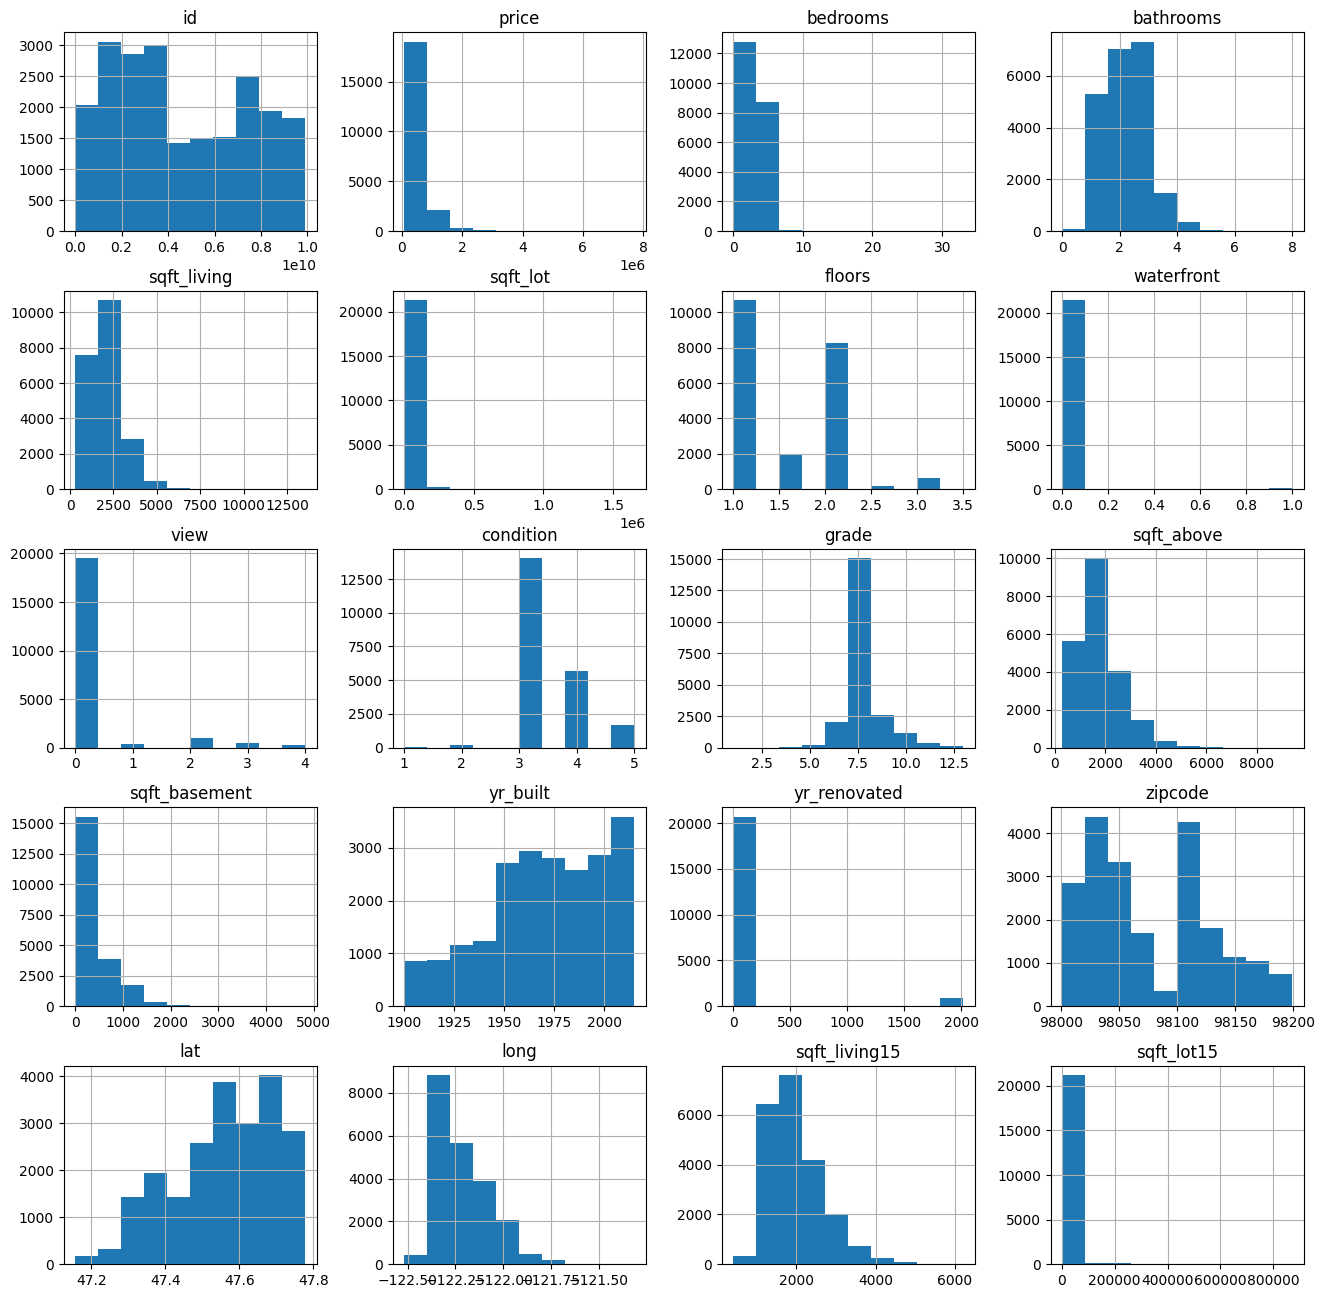

In [3]:
#comparing before scaling
dataset.hist(figsize=(16,16),bins=10)

In [4]:
len(dataset)


21613

In [5]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,NaN,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,NaN,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,NaN,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21611.000000,21612.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370830,2.114763,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930092,0.770181,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         2
bathrooms        1
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
dataset=dataset.drop(columns=['date','lat','long','zipcode','id'])


In [10]:
#split the target from the data
X = dataset.drop(columns='price').values
#Grab features and label from dataframe

y = dataset['price'].values





In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X = imputer.fit_transform(X)

In [12]:
X

array([[3.37082967e+00, 1.00000000e+00, 1.18000000e+03, ...,
        0.00000000e+00, 1.34000000e+03, 5.65000000e+03],
       [3.00000000e+00, 2.25000000e+00, 2.57000000e+03, ...,
        1.99100000e+03, 1.69000000e+03, 7.63900000e+03],
       [2.00000000e+00, 1.00000000e+00, 7.70000000e+02, ...,
        0.00000000e+00, 2.72000000e+03, 8.06200000e+03],
       ...,
       [2.00000000e+00, 7.50000000e-01, 1.02000000e+03, ...,
        0.00000000e+00, 1.02000000e+03, 2.00700000e+03],
       [3.00000000e+00, 2.50000000e+00, 1.60000000e+03, ...,
        0.00000000e+00, 1.41000000e+03, 1.28700000e+03],
       [2.00000000e+00, 7.50000000e-01, 1.02000000e+03, ...,
        0.00000000e+00, 1.02000000e+03, 1.35700000e+03]])

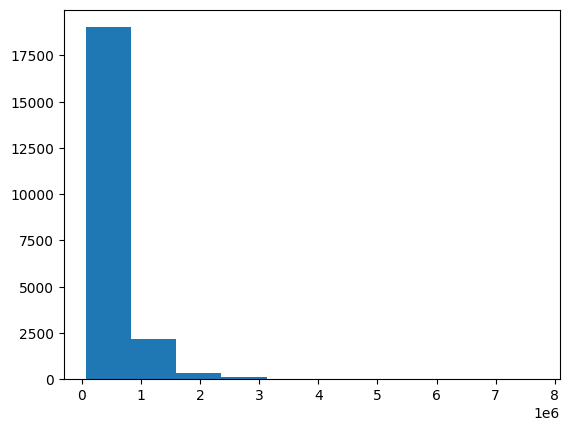

In [13]:
fig = plt.hist(dataset.price)

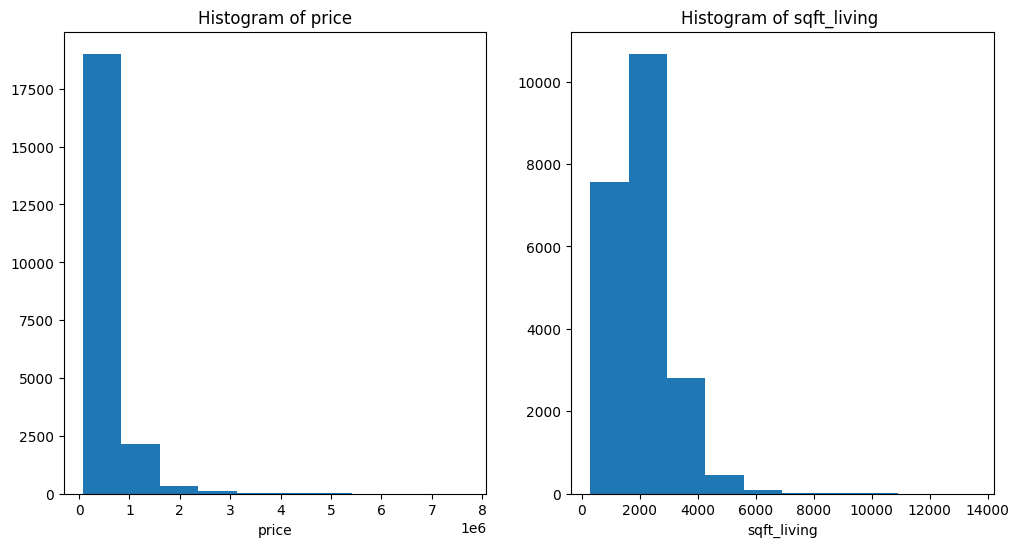

In [14]:
fig = plt.figure(figsize=(12, 6))
price = fig.add_subplot(121)
date = fig.add_subplot(122)

price.hist(dataset.price, bins=10)
price.set_xlabel('price')
price.set_title("Histogram of price")

date.hist(dataset.sqft_living, bins=10)
date.set_xlabel('sqft_living')
date.set_title("Histogram of sqft_living ")

plt.show()


Text(0, 0.5, 'bathrooms')

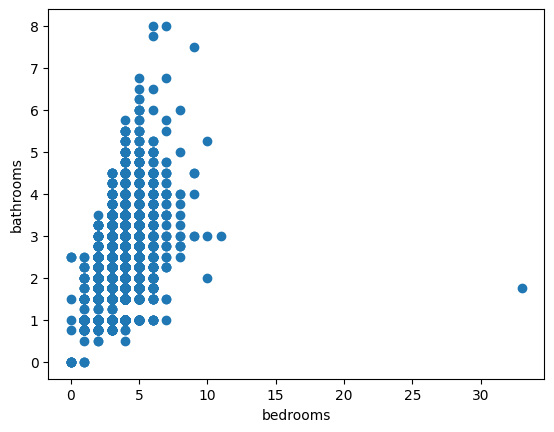

In [15]:
fig = plt.scatter(dataset.bedrooms, dataset.bathrooms)
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')

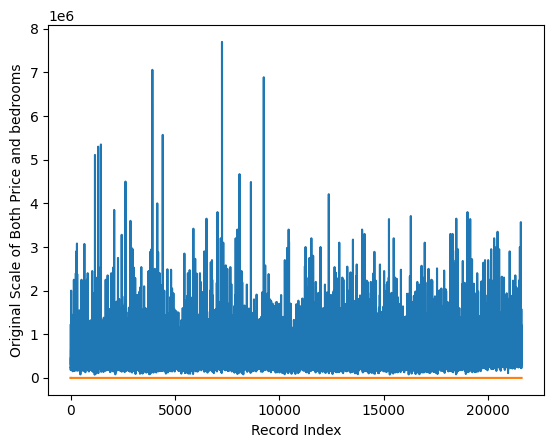

In [16]:
plt.plot(dataset.price)
plt.plot(dataset.bedrooms)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Price and bedrooms')
plt.show()


### MinMax Scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X

array([[1.02146354e-01, 1.25000000e-01, 6.71698113e-02, ...,
        0.00000000e+00, 1.61934263e-01, 5.74235339e-03],
       [9.09090909e-02, 2.81250000e-01, 1.72075472e-01, ...,
        9.88089330e-01, 2.22164860e-01, 8.02711852e-03],
       [6.06060606e-02, 1.25000000e-01, 3.62264151e-02, ...,
        0.00000000e+00, 3.99414903e-01, 8.51301880e-03],
       ...,
       [6.06060606e-02, 9.37500000e-02, 5.50943396e-02, ...,
        0.00000000e+00, 1.06866288e-01, 1.55763777e-03],
       [9.09090909e-02, 3.12500000e-01, 9.88679245e-02, ...,
        0.00000000e+00, 1.73980382e-01, 7.30573466e-04],
       [6.06060606e-02, 9.37500000e-02, 5.50943396e-02, ...,
        0.00000000e+00, 1.06866288e-01, 8.10982495e-04]])

In [18]:
print(X.min())
print(X.max())
print(X.min())
print(X.max())

0.0
1.0000000000000002
0.0
1.0000000000000002


Text(0, 0.5, 'Minmax Scale w/o outlier')

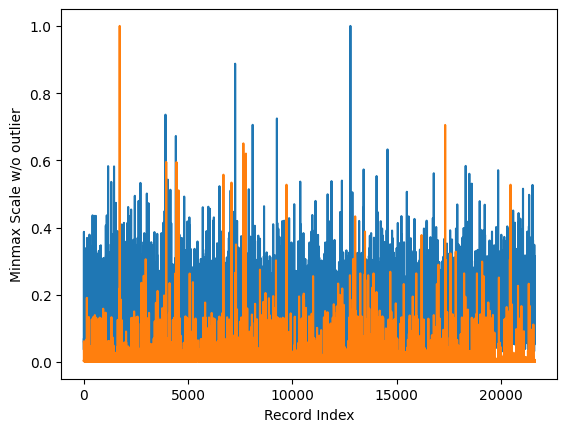

In [19]:
mms_df = pd.DataFrame(X[:, 2:4], columns =['Price', 'Bedrooms'])
plt.plot(mms_df['Price'])
plt.plot(mms_df['Bedrooms'])
plt.xlabel('Record Index')
plt.ylabel('Minmax Scale w/o outlier')

### LINEAR REGRESSION

In [20]:
#Grab features and label from dataframe

print(X.shape)
print(y.shape)

(21613, 15)
(21613,)


In [21]:
#Scale the features values for faster and better learning
scaler= StandardScaler()
X= scaler.fit_transform(X)


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: >]], dtype=object)

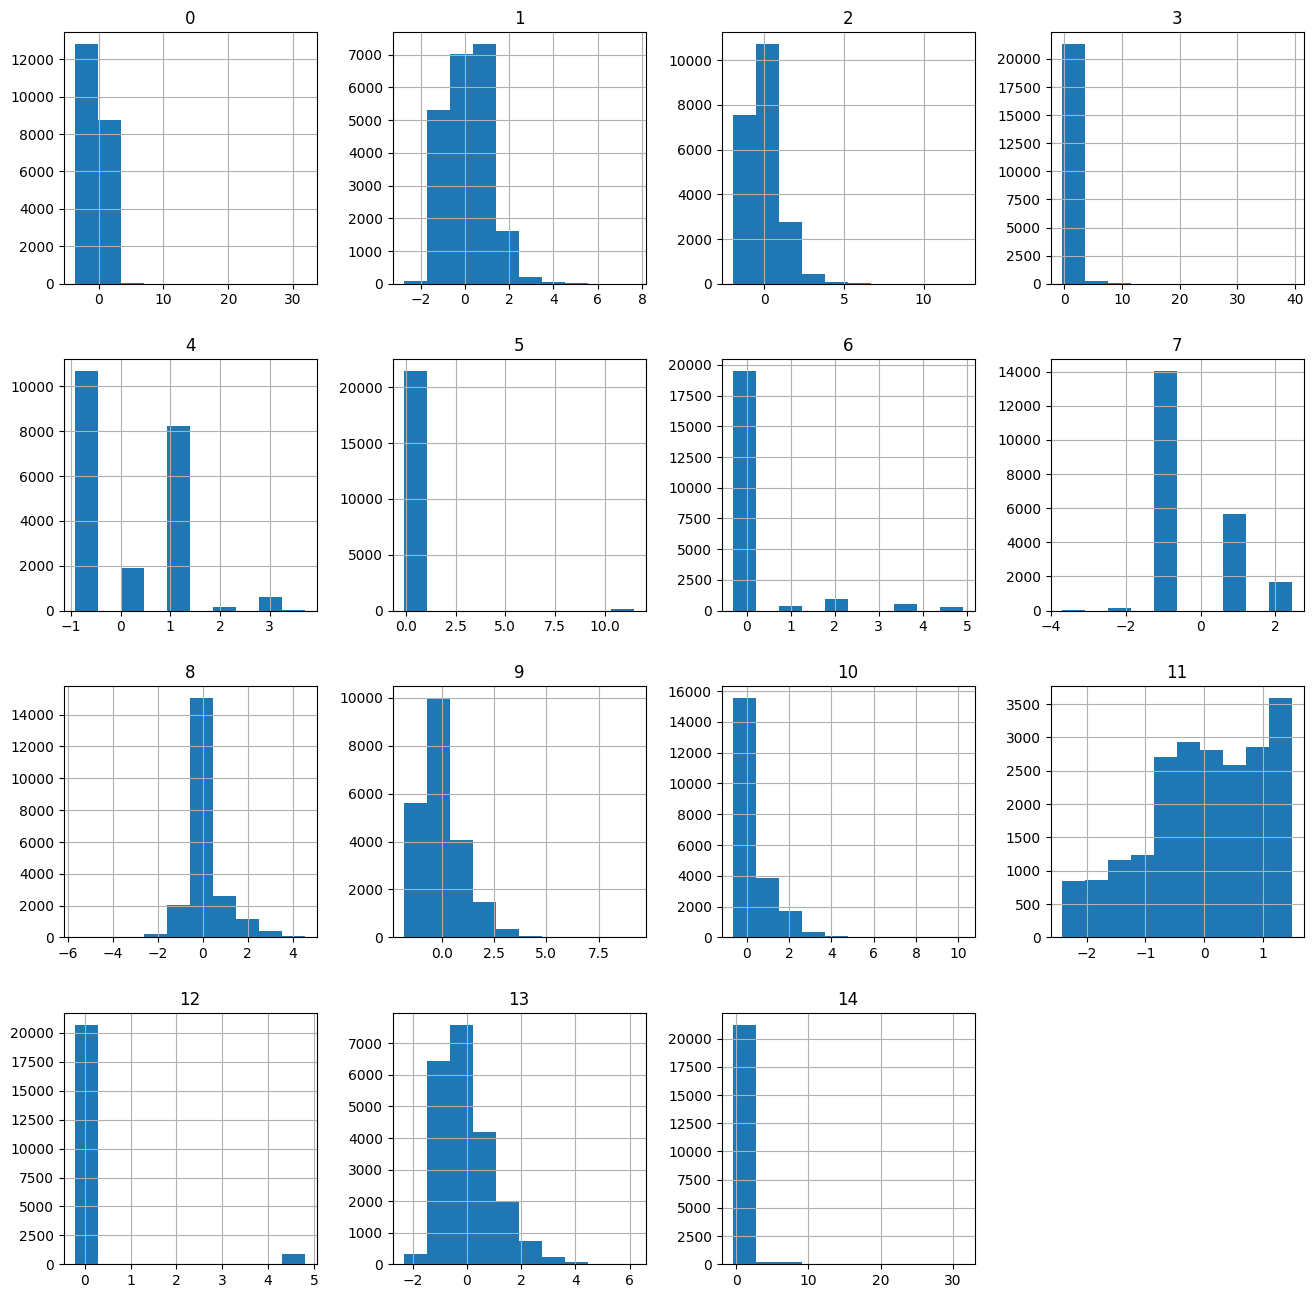

In [22]:
#Comparing after scaling
# Assuming X is your feature matrix in a DataFrame
X_dataframe = pd.DataFrame(X)

# Plotting histograms
X_dataframe.hist(figsize=(16, 16), bins=10)


In [23]:
#from sklearn.preprocessing import RobustScaler

#robust = RobustScaler()
#X_robust_scaled = robust.fit_transform(X)
#X_robust_scaled

In [24]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#create a linear regression model
model1 = LinearRegression()

#train the linear regression model
model1.fit(X_train,y_train)

#make prediction on the test
y_pred = model1.predict(X_test)



In [26]:
#calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
#calculate mean squared error
mse= mean_squared_error(y_test, y_pred)

#print the results
print(f"Mean Absolute Error: {mae: .4f}\n\n")
print(f"Mean Squared Error: {mse: .4f}\n\n")

#R2 SCORE
r2 = r2_score(y_test, y_pred)
print(f"R Squared : {r2: .4f}")


Mean Absolute Error:  143656.9470


Mean Squared Error:  52302078104.4373


R Squared :  0.6544


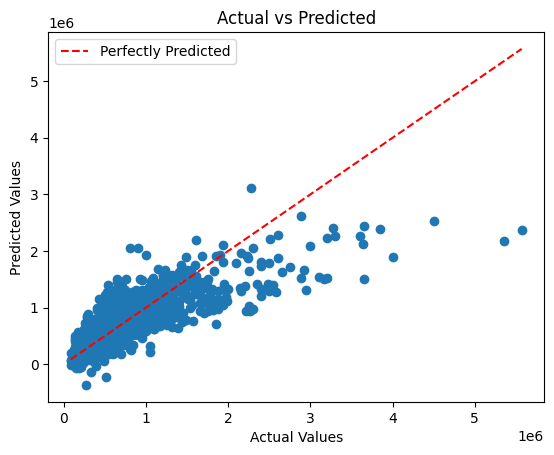

In [27]:
#Visualize the dataset
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfectly Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Random Forest Regression

In [28]:
#create a RandomForestRegressor  model
model2 = RandomForestRegressor()

#train the RandomForestRegressor  model
model2.fit(X_train,y_train)

#make prediction on the test
y_pred2 = model2.predict(X_test)




In [29]:
#calculate mean absolute error
mae2 = mean_absolute_error(y_test, y_pred2)
#calculate mean squared error
mse2= mean_squared_error(y_test, y_pred2)

#print the results
print(f"Mean Absolute Error: {mae2: .4f}\n\n")
print(f"Mean Squared Error: {mse2: .4f}\n\n")

#r2 squared
r2_rf = r2_score(y_test, y_pred2)
print(f"R Squared : {r2_rf: .4f}")


Mean Absolute Error:  120703.5136


Mean Squared Error:  43238611177.2706


R Squared :  0.7143


In [30]:
# Compare both models to identify which is better
if mae < mae2:
    print("Model 1 is better based on MAE.")
else:
    print("Model 2 is better based on MAE.")

if r2 > r2_rf:
    print("Model 1 is better based on R2.")
else:
    print("Model 2 is better based on R2.")

Model 2 is better based on MAE.
Model 2 is better based on R2.


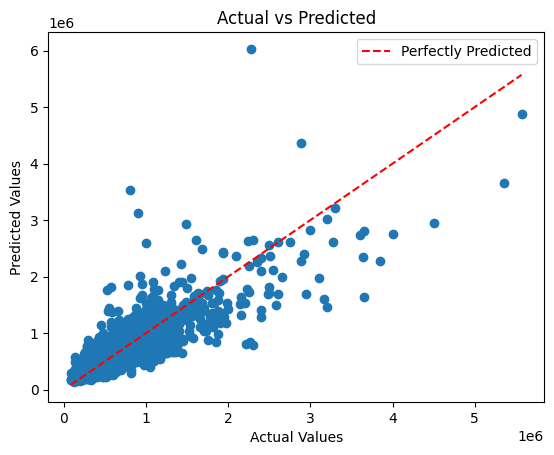

In [31]:
#Visualize the dataset
plt.scatter(y_test, y_pred2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfectly Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()